## One-way ANOVA

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

from statsmodels.formula.api import ols 

In [2]:
bike_sharing_data = pd.read_csv('datasets/bike_sharing_data_processed.csv')

bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [17]:
bike_sharing_data.shape

(731, 7)

In [18]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [19]:
bike_sharing_data.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


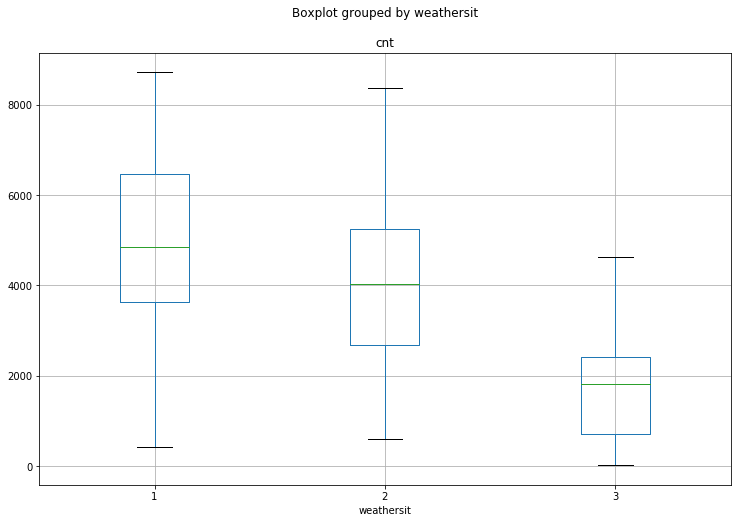

In [20]:
bike_sharing_data.boxplot(column=['cnt'], by='weathersit', figsize=(12, 8))

## The hypothesis being tested
https://statisticsbyjim.com/anova/post-hoc-tests-anova/

* __H0: No difference between means, i.e. ?x1 = ?x2 = ?x3__
* __Ha: Difference between means exist somewhere, i.e. ?x1 ? ?x2 ? ?x3, or ?x1 = ?x2 ? ?x3, or ?x1 ? ?x2 = ?x3__

### ANOVA with `scipy.stats`

In [21]:
stats.f_oneway(bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 1],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 2],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 3],)

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

### ANOVA with `statsmodels`
https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html

In [22]:
result = ols('cnt ~ C(weathersit)', data = bike_sharing_data).fit()

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.11e-17
Time:                        21:00:10   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

### Post - hoc test by using `Tukey's method`
https://www.statisticshowto.datasciencecentral.com/tukey-test-honest-significant-difference/

In [24]:
from statsmodels.stats.multicomp import MultiComparison

mul_com = MultiComparison(bike_sharing_data['cnt'], bike_sharing_data['weathersit'])

mul_result = mul_com.tukeyhsd()

print(mul_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------
